<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/Support_Vector_Machine/Support_Vector_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
# let's make some synthetic data points

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [155]:
x, y = make_blobs(n_samples = 1000,
                           centers=[[-2, -2], [2, 2]],
                           cluster_std=1.25,
                           random_state=42)

In [156]:
theta = np.radians(30) #30-degree rotation
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

x = x.dot(rotation_matrix)

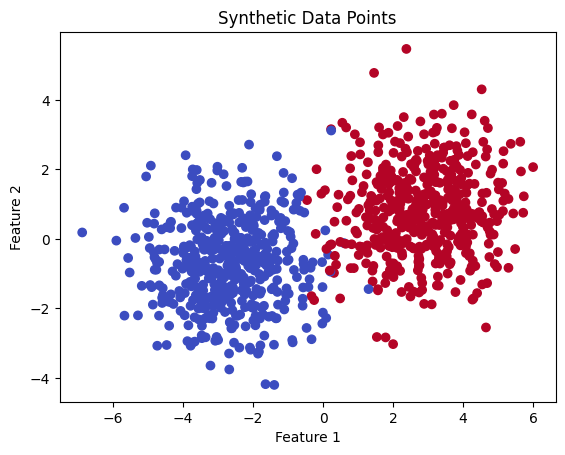

In [157]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data Points')
plt.show()

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [159]:
from sklearn.svm import SVC

In [160]:
svc = SVC(kernel='linear')

In [161]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [162]:
# prediction
y_pred = svc.predict(x_test)

In [163]:
from sklearn.metrics import classification_report, confusion_matrix

In [164]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       104
           1       0.99      0.99      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

[[103   1]
 [  1  95]]


In [165]:
rbf = SVC(kernel='rbf')

In [166]:
rbf.fit(x_train, y_train)

SVC()

In [169]:
y_pred_rbf = rbf.predict(x_test)

In [170]:
print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       104
           1       0.99      0.99      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

[[103   1]
 [  1  95]]


In [171]:
polynomial = SVC(kernel='poly')
polynomial.fit(x_train, y_train)

y_pred_polynomial = polynomial.predict(x_test)
print(classification_report(y_test, y_pred_polynomial))
print(confusion_matrix(y_test, y_pred_polynomial))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       104
           1       1.00      0.96      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

[[104   0]
 [  4  92]]


In [172]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(x_train, y_train)

y_pred_sigmoid = sigmoid.predict(x_test)
print(classification_report(y_test, y_pred_sigmoid))
print(confusion_matrix(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       104
           1       0.99      0.99      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

[[103   1]
 [  1  95]]


In [176]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : ['scale', 'auto'],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

In [177]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='accuracy')

In [178]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [179]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [180]:
y_pred_grid = grid.predict(x_test)

In [181]:
print(classification_report(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       104
           1       0.99      0.99      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

[[103   1]
 [  1  95]]
